In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'ckass_0',1:'class_1',2:'class_2'})

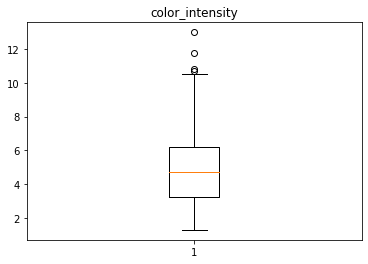

In [4]:
plt.boxplot(wine['color_intensity'],whis=1.5)
plt.title('color_intensity')
plt.show()

In [5]:
import numpy as np
def outliers_iqr(dt,col):
    quartile_1,quartile_3 = np.percentile(dt[col],[25,75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col]>upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]


outliers = outliers_iqr(wine,'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [6]:
#이상치 제거

drop_outliers = wine.drop(index = outliers.index)

print("original : ",wine.shape)
print("Drop outliers : ",drop_outliers.shape)

original :  (178, 14)
Drop outliers :  (174, 14)


In [9]:
#이상치 대체
#NaN으로 변경

wine.loc[outliers.index, 'color_intensity'] = np.NAN

#NaN이 된 이상치를 평균값으로 변경
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']


151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64